#Importing

In [ ]:
from google.colab import drive
from PIL import Image
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ah2.mat to ah2.mat
Saving lb2.mat to lb2.mat
Saving lp2.mat to lp2.mat
Saving X2.mat to X2.mat
Saving Y2.mat to Y2.mat
User uploaded file "ah2.mat" with length 289453 bytes
User uploaded file "lb2.mat" with length 301641 bytes
User uploaded file "lp2.mat" with length 308567 bytes
User uploaded file "X2.mat" with length 9742 bytes
User uploaded file "Y2.mat" with length 169994 bytes


#Installation

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 31.8 MB/s 
     |████████████████████████████████| 6.3 MB 29.6 MB/s 


In [ ]:
pip install rioxarray

     |████████████████████████████████| 46 kB 2.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 55.5 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.0-py3-none-any.whl size=54395 sha256=84213924ca09c5cf0078f7f4137c48e5cf66e3fba46e16638e93ca77a7f63c51
  Stored in directory: /root/.cache/pip/wheels/f2/0d/f2/29da7ed804b71eb1317c3683b373f59d7c0c4c501117f2b144
Successfully built rioxarray


In [ ]:
pip install earthpy

     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [ ]:
pip install mat4py

In [ ]:
from mat4py import loadmat
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import scipy
import pandas as pd


import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score


#Definition of open image and make it an array function, and the function of adjusting resolution "shrink".

In [ ]:
def openImageArr(str):
  return np.array(Image.open(str))

In [ ]:
#To change the resolution of the image array
def shrink(data, rows, cols):
    shrunk = np.zeros((rows,cols))
    for i in range(0,rows):
        for j in range(0,cols):
            row_sp = data.shape[0]//rows
            col_sp = data.shape[1]//cols
            zz = data[i*row_sp : i*row_sp + row_sp, j*col_sp : j*col_sp + col_sp]
            shrunk[i,j] = np.sum(zz)/((data.shape[0]//rows) * (data.shape[1]//cols))
    return shrunk
def shrinkeasy(data, rows, cols):
    shrunk = np.zeros((rows,cols))
    for i in range(0,rows):
        for j in range(0,cols):
            row_sp = data.shape[0]//rows
            col_sp = data.shape[1]//cols
            zz = data[i*row_sp : i*row_sp + row_sp, j*col_sp : j*col_sp + col_sp]
            shrunk[i,j] = np.sum(zz)
    return shrunk
#More easily change the resolution of set of imageArrs
def processImage(imageArr, starty, startx, rangey, rangex):
  slicedArr = imageArr[starty:(starty + rangey), startx:(startx + rangex)]
  return shrink(slicedArr,218,281)

#Load data from Temperature image, and Definition of Xstart and Ystart

In [ ]:
#Way to open tif file and look up its coordinates
#Band_1:temperature
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/LST_night_2018utm49n_newdata_deployed_2 8.tif")
band_1 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_1.shape

band_1.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.025e+05 6.035e+05 ... 8.815e+05 8.825e+05
  * y            (y) float64 2.635e+06 2.634e+06 ... 2.419e+06 2.418e+06
    spatial_ref  int64 0

In [ ]:
band_1

<xarray.DataArray (band: 1, y: 218, x: 281)>
array([[[  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
        ...,
        [  0.      , 294.371632, ...,   0.      ,   0.      ],
        [  0.      , 293.167494, ...,   0.      ,   0.      ]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.025e+05 6.035e+05 ... 8.815e+05 8.825e+05
  * y            (y) float64 2.635e+06 2.634e+06 ... 2.419e+06 2.418e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
band_1.rio.to_raster('temp.tif')

The temperature file is an image of size 218 by 281 (y*x)

In [ ]:
tempX = band_1.coords['x']
tempY = band_1.coords['y']

In [ ]:
Xstart = 602504.163 

In [ ]:
Ystart = 2635258.89 

In [ ]:
tempX[0]

<xarray.DataArray 'x' ()>
array(602504.163)
Coordinates:
    x            float64 6.025e+05
    spatial_ref  int64 0

In [ ]:
tempX[-1]

<xarray.DataArray 'x' ()>
array(882504.163)
Coordinates:
    x            float64 8.825e+05
    spatial_ref  int64 0

In [ ]:
tempY[0]

<xarray.DataArray 'y' ()>
array(2635258.89)
Coordinates:
    y            float64 2.635e+06
    spatial_ref  int64 0

In [ ]:
tempX[182]

<xarray.DataArray 'x' ()>
array(784504.163)
Coordinates:
    x            float64 7.845e+05
    spatial_ref  int64 0

In [ ]:
tempY[148]

<xarray.DataArray 'y' ()>
array(2487258.89)
Coordinates:
    y            float64 2.487e+06
    spatial_ref  int64 0

In [ ]:
np.where(tempX > 694487)

(array([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
        222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269

In [ ]:
np.where(tempX > 792400)

(array([190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
        203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
        229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
        242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
        255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280]),)

In [ ]:
np.where(tempY > 2450000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
np.where(tempY < 2577747)

(array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217]),)

In [ ]:
#Temperature image on 2018 night
NightImage = band_1.data[0,:,:]

In [ ]:
NightImage.shape

(218, 281)

In [ ]:
TempData = NightImage[:,:] #The smaller range

In [ ]:
TempData

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        , 293.70150411, 292.50393307, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 294.37163197, 292.493433  , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 293.1674943 , 292.18214956, ...,   0.        ,
          0.        ,   0.        ]])

#Impervious_surface_percentage

In [ ]:
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/gmis_impervious_surface_percentage_geographic_1000mutm[5706].tif")
band_2 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_2.shape
band_2.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.656e+05 5.666e+05 ... 9.203e+05 9.213e+05
  * y            (y) float64 2.689e+06 2.688e+06 ... 2.366e+06 2.365e+06
    spatial_ref  int64 0

In [ ]:
arrayX = np.array(band_2.coords['x'])

arrayY = np.array(band_2.coords['y'])

In [ ]:
arrayX.shape

(357,)

In [ ]:
arrayY.shape

(325,)

In [ ]:
imageImper = openImageArr('/content/drive/MyDrive/Colab Notebooks/gmis_impervious_surface_percentage_geographic_1000mutm[5706].tif')
imperviousData = imageImper[54:272,37:318]

In [ ]:
max

<function max>

In [ ]:
np.where(arrayX > 602504.163 + 281000)
#End of band_2 inspections

(array([319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356]),)

In [ ]:
arrayX[129]

694512.0951656862

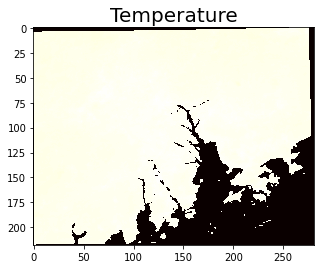

In [ ]:
plt.title("Temperature", fontsize =20)
plt.imshow(NightImage, cmap='hot', interpolation='nearest')
plt.show()

#Population

In [ ]:
#Inspect the Population data
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/population.tif")
band_3 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_3.shape
band_3.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.656e+05 5.666e+05 ... 9.196e+05 9.206e+05
  * y            (y) float64 2.689e+06 2.688e+06 ... 2.366e+06 2.365e+06
    spatial_ref  int64 0

In [ ]:
arrX3 = band_3.coords['x']
arrY3 = band_3.coords['y']

In [ ]:
arrX3

<xarray.DataArray 'x' (x: 356)>
array([565621.771, 566621.771, 567621.771, ..., 918621.771, 919621.771,
       920621.771])
Coordinates:
  * x            (x) float64 5.656e+05 5.666e+05 ... 9.196e+05 9.206e+05
    spatial_ref  int64 0

In [ ]:
arrY3

<xarray.DataArray 'y' (y: 325)>
array([2689409.76, 2688409.76, 2687409.76, ..., 2367409.76, 2366409.76,
       2365409.76])
Coordinates:
  * y            (y) float64 2.689e+06 2.688e+06 ... 2.366e+06 2.365e+06
    spatial_ref  int64 0

In [ ]:
np.where(arrX3 > Xstart)

(array([ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 210, 211, 212, 213, 214

In [ ]:
np.where(arrY3 > (Ystart))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),)

In [ ]:
arrY3.shape

(325,)

In [ ]:
arrX3[106]

<xarray.DataArray 'x' ()>
array(671621.771)
Coordinates:
    x            float64 6.716e+05
    spatial_ref  int64 0

In [ ]:
arrY3[213]

<xarray.DataArray 'y' ()>
array(2476409.76)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [ ]:
arrY3[213]

<xarray.DataArray 'y' ()>
array(2476409.76)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [ ]:
PstartY = 54
PstartX = 37

In [ ]:
#End of band_3:population inspection

#Terrain

In [ ]:
#Band_4:Terrain
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/terrain.tif")
band_4 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_4.shape

(1, 278, 308)

In [ ]:
arrX4 = band_4.coords['x']
arrY4 = band_4.coords['y']

In [ ]:
arrX4

<xarray.DataArray 'x' (x: 308)>
array([588462.032, 589462.032, 590462.032, ..., 893462.032, 894462.032,
       895462.032])
Coordinates:
  * x            (x) float64 5.885e+05 5.895e+05 ... 8.945e+05 8.955e+05
    spatial_ref  int64 0

In [ ]:
arrY4

<xarray.DataArray 'y' (y: 278)>
array([2666072.21, 2665072.21, 2664072.21, ..., 2391072.21, 2390072.21,
       2389072.21])
Coordinates:
  * y            (y) float64 2.666e+06 2.665e+06 ... 2.39e+06 2.389e+06
    spatial_ref  int64 0

In [ ]:
np.where(arrX4 > Xstart + 281000)

(array([296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307]),)

In [ ]:
np.where(arrY4 > Ystart - 218000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
arrX4[83]

<xarray.DataArray 'x' ()>
array(671462.032)
Coordinates:
    x            float64 6.715e+05
    spatial_ref  int64 0

In [ ]:
np.where(arrY4 > Ystart)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)

In [ ]:
arrY4[190]

<xarray.DataArray 'y' ()>
array(2476072.21)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [ ]:
arrY4[190]

<xarray.DataArray 'y' ()>
array(2476072.21)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [ ]:
TstartY = 30
TstartX = 15

#Forest height

In [ ]:
#Band5-forest height

landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/Forest_height_2019_SASIAutm49n.tif")
band_5 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_5.shape
band_5.coords


Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.025e+05 6.035e+05 6.045e+05 ... 8.81e+05 8.82e+05
  * y            (y) float64 2.636e+06 2.635e+06 ... 2.42e+06 2.419e+06
    spatial_ref  int64 0

In [ ]:
arrX5 = band_5.coords['x']
arrY5 = band_5.coords['y']

In [ ]:
arrY5.shape

(217,)

In [ ]:
arrX5[0]

<xarray.DataArray 'x' ()>
array(602486.47311179)
Coordinates:
    x            float64 6.025e+05
    spatial_ref  int64 0

In [ ]:
arrY5[0]

<xarray.DataArray 'y' ()>
array(2635549.0867159)
Coordinates:
    y            float64 2.636e+06
    spatial_ref  int64 0

In [ ]:
Ystart

2635258.89

In [ ]:
Xstart

602504.163

In [ ]:
arrY5

<xarray.DataArray 'y' (y: 217)>
array([2635549.086716, 2634547.818348, 2633546.549979, ..., 2421277.655921,
       2420276.387552, 2419275.119184])
Coordinates:
  * y            (y) float64 2.636e+06 2.635e+06 ... 2.42e+06 2.419e+06
    spatial_ref  int64 0

In [ ]:
np.where(arrX5 > Xstart)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [ ]:
np.where(arrY5 > Ystart - 218000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
arrX5[69]

<xarray.DataArray 'x' ()>
array(671602.78113821)
Coordinates:
    x            float64 6.716e+05
    spatial_ref  int64 0

In [ ]:
arrY5[159]

<xarray.DataArray 'y' ()>
array(2476347.41617166)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [ ]:
FstartY = 0
FstartX = 0

#Preperation of Y

In [ ]:
selectedTempX = tempX[:] #(59+1):(159+1)
dataX = ([selectedTempX,]*218)
dataX = np.array(dataX)
dataX

array([[602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       ...,
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163]])

In [ ]:
selectedTempY = tempY[:] #(59+1):(159+1)
dataY = ([selectedTempY,]*281)
dataY = np.array(dataY)
dataY = dataY.transpose()

In [ ]:
dataY

array([[2635258.89, 2635258.89, 2635258.89, ..., 2635258.89, 2635258.89,
        2635258.89],
       [2634258.89, 2634258.89, 2634258.89, ..., 2634258.89, 2634258.89,
        2634258.89],
       [2633258.89, 2633258.89, 2633258.89, ..., 2633258.89, 2633258.89,
        2633258.89],
       ...,
       [2420258.89, 2420258.89, 2420258.89, ..., 2420258.89, 2420258.89,
        2420258.89],
       [2419258.89, 2419258.89, 2419258.89, ..., 2419258.89, 2419258.89,
        2419258.89],
       [2418258.89, 2418258.89, 2418258.89, ..., 2418258.89, 2418258.89,
        2418258.89]])

In [ ]:
dataY.shape

(218, 281)

In [ ]:
#Final checking before use
dataY.shape

(218, 281)

#Loading lp2, ah2 and lb2

In [ ]:
datalp = loadmat('lp2.mat')
dataah = loadmat('ah2.mat')
datalb = loadmat('lb2.mat')
lp2X = loadmat('X2.mat')
lp2Y = loadmat('Y2.mat')

arrlp2 = np.array(datalp['lp2'])
arrah2 = np.array(dataah['ah2'])
arrlb2 = np.array(datalb['lb2'])

arrX = np.array(lp2X['X2'])
arrY = np.array(lp2Y['Y2'])

In [ ]:
arrlp2.shape

(347, 461)

In [ ]:
arrlp2X = arrX[0]
arrlp2Y = arrY[:,0]

In [ ]:
selectedArea = arrlp2[35:277,74:386]
selectedAh = arrah2[35:277,74:386]
selectedLb = arrlb2[35:277,74:386]

#To reverse along the Y coordinates
revArea = np.flipud(selectedArea)
revAh = np.flipud(selectedAh)
revLb = np.flipud(selectedLb)

In [ ]:
arrX[0].shape

(461,)

In [ ]:
arrYud = np.flipud(arrY)

In [ ]:
arrYtrans = arrY.transpose()

In [ ]:
arrY

array([[2386324.326, 2386324.326, 2386324.326, ..., 2386324.326,
        2386324.326, 2386324.326],
       [2387224.326, 2387224.326, 2387224.326, ..., 2387224.326,
        2387224.326, 2387224.326],
       [2388124.326, 2388124.326, 2388124.326, ..., 2388124.326,
        2388124.326, 2388124.326],
       ...,
       [2695924.326, 2695924.326, 2695924.326, ..., 2695924.326,
        2695924.326, 2695924.326],
       [2696824.326, 2696824.326, 2696824.326, ..., 2696824.326,
        2696824.326, 2696824.326],
       [2697724.326, 2697724.326, 2697724.326, ..., 2697724.326,
        2697724.326, 2697724.326]])

In [ ]:
arrYtrans

array([[2386324.326, 2387224.326, 2388124.326, ..., 2695924.326,
        2696824.326, 2697724.326],
       [2386324.326, 2387224.326, 2388124.326, ..., 2695924.326,
        2696824.326, 2697724.326],
       [2386324.326, 2387224.326, 2388124.326, ..., 2695924.326,
        2696824.326, 2697724.326],
       ...,
       [2386324.326, 2387224.326, 2388124.326, ..., 2695924.326,
        2696824.326, 2697724.326],
       [2386324.326, 2387224.326, 2388124.326, ..., 2695924.326,
        2696824.326, 2697724.326],
       [2386324.326, 2387224.326, 2388124.326, ..., 2695924.326,
        2696824.326, 2697724.326]])

In [ ]:
arrYtrans[0].shape

(347,)

In [ ]:
arrband = np.array([1])

In [ ]:
arrband

array([1])

In [ ]:
#Convert numpy to xarray
da = xr.DataArray(data = np.array([arrlp2]),
          dims=["band","y","x"],
          coords=dict(
            band = ("band",arrband),
            x=("x",arrX[0]),
            y=("y",arrYtrans[0]),
            spatial_ref = 0,
          ),
          )

In [ ]:
da.attrs["scale_factor"] = 1.0
da.attrs["add_offset"] = 0.0

In [ ]:
da

<xarray.DataArray (band: 1, y: 347, x: 461)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.367e+05 5.376e+05 ... 9.498e+05 9.507e+05
  * y            (y) float64 2.386e+06 2.387e+06 ... 2.697e+06 2.698e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
da.rio.to_raster('lp2.tif')

#Adjusting lp2, ah2 and lb2's resolution to align with that of temperature.

In [ ]:
lp2Data = processImage(revArea,0,0,242,312)
ah2Data = processImage(revAh, 0,0,242,312)
lb2Data = processImage(revLb, 0,0,242,312)

In [ ]:
lp2Data.shape

(218, 281)

#Operations to open other images on Forest height, Population and Terrain.

In [ ]:
imagePopulation = openImageArr('/content/drive/MyDrive/Colab Notebooks/population.tif')

In [ ]:
PopulationData = imagePopulation[PstartY:(PstartY+218), PstartX:(PstartX+281)]

In [ ]:
imageTerrain = openImageArr('/content/drive/MyDrive/Colab Notebooks/terrain.tif')
TerrainData = imageTerrain[TstartY:(TstartY + 218), TstartX:(TstartX + 281)]

In [ ]:
imageForest = openImageArr('/content/drive/MyDrive/Colab Notebooks/Forest_height_2019_SASIAutm49n.tif')
ForestData = imageForest[FstartY:(FstartY + 218), FstartX:(FstartX + 281)]

In [ ]:
ForestData[:,-1].shape

(217,)

In [ ]:
CAFor = np.c_[ForestData, ForestData[:,-1]]

In [ ]:
CAFor.shape

(217, 281)

In [ ]:
CAFor[-1,:].shape

(281,)

In [ ]:
ForData = np.r_[CAFor, [CAFor[-1,:]]]

In [ ]:
ForData.shape

(218, 281)

#Merge the above features into a datasat.

Firstly, we want to include the surrounding grids' features to the
center temperature grid.

In [ ]:
def filter(image):#Default filter
  return image[(CenterImageSet[1] > 10000) & (cut(TempData,1,1,218,281) > 250)  & (CenterImageSet[0] > 0) & (CenterImageSet[0] < 100) & (CenterImageSet[2] > 100)]

In [ ]:
#CIS[0]=imperviousData, CenterImageSet[1](CIS[1])=lp2Data, CIS[2]=PopulationData, CIS[3]=Forest, CIS[4]=ah2, CIS[5]=lb2, CIS[?]=Terrain,
def filter2(image):
  return image[(CenterImageSet[3] > 0) & (CenterImageSet[4] > 0) & (CenterImageSet[1] > 10000) & (cut(TempData,2,2,280,217) > 250)  & (CenterImageSet[2] > 100)  & (CenterImageSet[0] > 0) & (CenterImageSet[0] < 100)]

In [ ]:
def filter3(image):
  return image[(CenterImageSet[1] > 10000) & (cut(TempData,2,2,217,280) > 250)  & (CenterImageSet[0] > 0) & (CenterImageSet[0] < 100)]

In [ ]:
def filter(image):
  return image[(CenterImageSet[3] > 0) & (CenterImageSet[3] < 101) & (CenterImageSet[2] > 100) &(CenterImageSet[1] > 10000) & (cut(TempData,1,1,218,281) > 250)  & (CenterImageSet[0] > 0) & (CenterImageSet[0] < 100)]

In [ ]:
def cut(image,y0,x0,yn,xn):
  return image[y0-1:yn,x0-1:xn]

In [ ]:
#Create an array of the 4 feature images
ImageSet = []
ImageSet.append(imperviousData)
ImageSet.append(lp2Data)
ImageSet.append(PopulationData)
ImageSet.append(ForData)
ImageSet.append(ah2Data)
ImageSet.append(lb2Data)
#ImageSet.append(TerrainData)

In [ ]:
# Then we create three sets from the ImageSet, first test out
CenterImageSet = []
UpDownFeatureSet = []
LeftRightFeatureSet = []
UpperLRFeatureSet = []
LowerLRFeatureSet = []

for image in ImageSet:
  CenterImageSet.append(image) #Normal Feature

# Extra Features:
# for image in ImageSet:
#   CenterImageSet.append(cut(image,2,2,217,280))
# for image in ImageSet:
#   UpDownFeatureSet.append(cut(image,1,2,216,280))
#   UpDownFeatureSet.append(cut(image,3,2,218,280))
# for image in ImageSet:
#   LeftRightFeatureSet.append(cut(image,2,1,217,279))
#   LeftRightFeatureSet.append(cut(image,2,3,217,281))
# for image in ImageSet:
#   UpperLRFeatureSet.append(cut(image,1,1,216,279))
#   UpperLRFeatureSet.append(cut(image,1,3,216,281))
# for image in ImageSet:
#   LowerLRFeatureSet.append(cut(image,3,1,218,279))
#   LowerLRFeatureSet.append(cut(image,3,3,218,281))

In [ ]:
# tempDF = pd.DataFrame(data = filter(cut(TempData,2,2,217,280)), columns = ["temperature"])
# tempDF.insert(1, 'Y', filter(cut(dataY,2,2,217,280)), True)
# tempDF.insert(2, 'X', filter(cut(dataX,2,2,217,280)), True)

tempDF = pd.DataFrame(data = filter(TempData), columns = ["temperature"])
tempDF.insert(1, 'Y', filter(dataY), True)
tempDF.insert(1, 'X', filter(dataX), True)

In [ ]:
counter = 3
for image in CenterImageSet:
  tempDF.insert(counter,counter,filter(image), True)
  counter = counter + 1

In [ ]:
# for image in UpDownFeatureSet:
#   tempDF.insert(counter,counter,filter(image), True)
#   counter = counter + 1
# for image in LeftRightFeatureSet:
#   tempDF.insert(counter,counter,filter(image), True)
#   counter = counter + 1
# for image in UpperLRFeatureSet:
#   tempDF.insert(counter,counter,filter(image), True)
#   counter = counter + 1
# for image in LowerLRFeatureSet:
#   tempDF.insert(counter,counter,filter(image), True)
#   counter = counter + 1

In [ ]:
281*218

61258

In [ ]:
tempDF

,temperature,X,Y,3,4,5,6,7,8
0,289.358816,631504.163,2630258.89,1,10041.799805,136.272781,12,1.926580e+05,32737.829590
1,289.269109,632504.163,2630258.89,1,16673.509521,136.272781,12,3.001243e+05,47491.079590
2,290.116758,631504.163,2619258.89,3,11909.649658,228.211212,12,2.143745e+05,33922.199707
3,289.682967,633504.163,2618258.89,1,18369.834839,228.211182,12,3.424868e+05,56172.239502
4,290.384309,770504.163,2618258.89,4,11724.489746,373.748962,7,2.153416e+05,34744.609863
...,...,...,...,...,...,...,...,...,...
3904,290.541970,632504.163,2420258.89,1,15936.337566,174.624939,7,2.995414e+05,42754.380127
3905,291.355578,636504.163,2420258.89,1,25600.734741,174.624969,3,4.873806e+05,80138.610107
3906,291.776267,696504.163,2420258.89,1,90099.152953,148.403000,10,1.658231e+06,267658.234130
3907,290.784353,632504.163,2419258.89,1,27606.350265,174.624969,3,5.059182e+05,54253.640625


#Output Dataframe

In [ ]:
tempDF.to_csv('TempDataMostUpdated.csv')
!cp TempDataMostUpdated.csv "drive/My Drive/"

In [ ]:
tempDF = pd.read_csv('/content/tempdata.csv')

In [ ]:
tempDF

,temperature,X,Y,3,4,5,6
0,289.358816,631504.163,2630258.89,1,10041.799805,136.272781,12
1,289.269109,632504.163,2630258.89,1,16673.509521,136.272781,12
2,290.036759,609504.163,2628258.89,2,14291.579590,238.358368,0
3,289.772099,608504.163,2623258.89,1,11631.909790,238.358353,0
4,289.472623,609504.163,2623258.89,1,25595.724609,238.358398,0
...,...,...,...,...,...,...,...
13413,291.494197,640504.163,2419258.89,1,33828.219970,205.912384,0
13414,291.590662,651504.163,2419258.89,2,11316.978313,334.336945,0
13415,292.245609,652504.163,2419258.89,2,21299.078695,334.336945,0
13416,291.646064,672504.163,2419258.89,1,25641.290039,416.435059,7


In [ ]:
indexNames = tempDF[ tempDF['X'] <= 730000 ].index

In [ ]:
tempDF.drop(indexNames , inplace=True)

In [ ]:
indexNamesY = tempDF[ tempDF['Y'] <= 2500000 ].index

In [ ]:
tempDF.drop(indexNamesY , inplace=True)

In [ ]:
tempDF = tempDF.drop(['Unnamed: 0'], axis=1)

In [ ]:
tempDF

#Linear Regression with least squares

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(train_features, train_labels)

In [ ]:
reg.score(test_features, test_labels)

0.40613304196915745

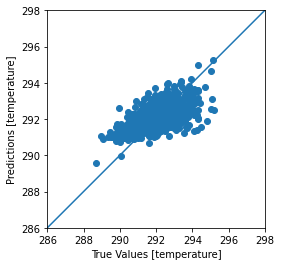

In [ ]:
test_predictions = reg.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
np.corrcoef(test_labels, test_predictions)

array([[1.        , 0.63752872],
       [0.63752872, 1.        ]])

In [ ]:
impervious_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
impervious_normalizer.adapt(train_features['Impervious'])

In [ ]:
impervious_model = tf.keras.Sequential([
    impervious_normalizer,
    layers.Dense(units=1)
])

impervious_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_12 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
impervious_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = impervious_model.fit(
    train_features['Impervious'], train_labels,
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

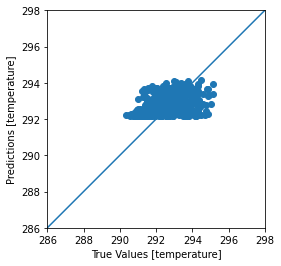

In [ ]:
test_predictions = impervious_model.predict(test_features['Impervious']).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
plot_horsepower(x,y)

#Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
def SelectArea(tempDF):
  indexNamesX1 = tempDF[ tempDF['X'] >= 773110 ].index
  tempDF.drop(indexNamesX1 , inplace=True)
  indexNamesX2 = tempDF[ tempDF['X'] <= 690000 ].index
  tempDF.drop(indexNamesX2 , inplace=True)
  indexNamesY1 = tempDF[ tempDF['Y'] >= 2580000 ].index
  tempDF.drop(indexNamesY1 , inplace=True)
  indexNamesY2 = tempDF[ tempDF['Y'] <= 2510000 ].index
  tempDF.drop(indexNamesY2 , inplace=True)
  tempDF = tempDF.drop(['X'], axis=1)
  tempDF = tempDF.drop(['Y'], axis=1)
  return tempDF;

In [ ]:
#SeltempDF = tempDF.loc[(tempDF['X'] <= 790000) | (tempDF['Y'] >= 2490000)]

In [ ]:
SeltempDF = SelectArea(tempDF)

In [ ]:
SeltempDF

,temperature,3,4,5,6,7,8
538,292.969519,40,17087.746421,1312.538940,7,3.145845e+05,50176.299805
539,292.825811,19,36057.869140,1130.214111,3,6.652490e+05,108189.079101
540,292.523207,5,16180.539795,616.078552,8,3.016866e+05,49544.289795
541,292.062182,3,11817.069702,1300.381714,6,2.148580e+05,34333.404785
542,292.544995,32,14013.344848,1263.346558,8,2.670024e+05,44816.709961
...,...,...,...,...,...,...,...
2752,293.889388,37,158959.394877,1989.892334,11,3.004988e+06,451998.094176
2753,294.126660,64,56468.838385,10014.072266,3,1.091757e+06,174578.246094
2754,293.249849,16,55483.471655,1454.544067,3,1.076282e+06,162196.347732
2755,293.242185,3,182125.421478,1454.544067,4,2.503149e+06,295540.468003


In [ ]:
train_dataset = SeltempDF.sample(frac=1, random_state=0) # Set frac to 1 because this tempDF dataset is used exclusively for training
test_dataset = SeltempDF.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('temperature')
test_labels = test_features.pop("temperature")
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
train_dataset

,temperature,3,4,5,6,7,8
614,290.607526,2,97982.845396,902.985168,12,1.858817e+06,2.917842e+05
1547,292.060582,31,269986.501802,6123.873535,3,4.716711e+06,5.415399e+05
1669,292.742695,68,164829.357725,2761.906250,6,4.069237e+06,5.084010e+05
960,292.279069,35,309080.328400,1617.907471,13,6.266273e+06,8.462942e+05
580,292.537373,19,73068.926964,1312.539062,6,1.371685e+06,2.156934e+05
...,...,...,...,...,...,...,...
2668,293.430456,17,178770.819166,3921.711914,5,3.507510e+06,5.269488e+05
844,293.060326,22,33507.688113,9068.543945,10,6.268489e+05,8.866238e+04
1920,292.279993,5,60797.151619,1772.137939,16,1.113356e+06,1.280401e+05
1627,292.831345,32,305471.102199,14501.342773,9,7.236395e+06,1.955821e+06


In [ ]:
# Instantiate model with 500 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42, max_features = 2)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Hong Kong Island Area with samples filtered
def PrepareTest():
  testDF = pd.DataFrame(data = (filter(TempData)), columns = ["temperature"])
  testDF.insert(1, 'Y', (filter(dataY)), True)
  testDF.insert(2, 'X', (filter(dataX)), True)
  counter = 3

  for image in CenterImageSet:
    testDF.insert(counter,counter,filter(image), True)
    counter = counter + 1
  

  indexNamesX1 = testDF[ testDF['X'] <= 790000 ].index
  testDF.drop(indexNamesX1 , inplace=True)
  indexNamesX2 = testDF[ testDF['X'] >= 850000 ].index
  testDF.drop(indexNamesX2 , inplace=True)
  indexNamesY1 = testDF[ testDF['Y'] >= 2490000 ].index
  testDF.drop(indexNamesY1 , inplace=True)
  indexNamesY2 = testDF[ testDF['Y'] <= 2450000 ].index
  testDF.drop(indexNamesY2 , inplace=True)
  return testDF

TestDF = PrepareTest()
TestDF = TestDF.drop(['X'], axis=1)
TestDF = TestDF.drop(['Y'], axis=1)
Test_dataset = TestDF
Test_features = Test_dataset.copy()
Test_labels = Test_features.pop("temperature")

In [ ]:
def PrepareTest(tempDF):
  indexNamesX1 = tempDF[ tempDF['X'] >= 850000 ].index
  tempDF.drop(indexNamesX1 , inplace=True)
  indexNamesX2 = tempDF[ tempDF['X'] <= 790000 ].index
  tempDF.drop(indexNamesX2 , inplace=True)
  indexNamesY1 = tempDF[ tempDF['Y'] >= 2490000 ].index
  tempDF.drop(indexNamesY1 , inplace=True)
  indexNamesY2 = tempDF[ tempDF['Y'] <= 2450000 ].index
  tempDF.drop(indexNamesY2 , inplace=True)
  tempDF = tempDF.drop(['X'], axis=1)
  tempDF = tempDF.drop(['Y'], axis=1)
  return tempDF;

TestDF = PrepareTest(tempDF)
Test_dataset = TestDF
Test_features = Test_dataset.copy()
Test_labels = Test_features.pop("temperature")

In [ ]:
# Use the forest's predict method on the test data
Test_predictions = rf.predict(Test_features)
# Calculate the absolute errors
errors = abs(Test_predictions - Test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', (np.mean(errors)))

Mean Absolute Error: 0.5709307555109507


array([[1.       , 0.6062106],
       [0.6062106, 1.       ]])

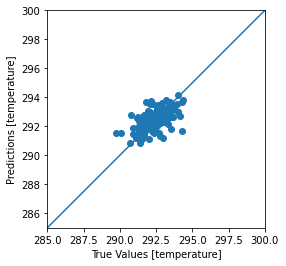

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(Test_labels, Test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [285,300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
np.corrcoef(Test_labels, Test_predictions)

In [ ]:
TestDF

,temperature,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
3284,291.640501,8,79490.472419,805.892578,7,1.858432e+06,337310.195528,32,2,34530.424804,178711.135123,805.892639,805.892517,0,10,6.734414e+05,4.659208e+06,112940.231201,1.187819e+06,12,1,51282.234709,76324.300243,805.892456,843.565430,0,7,1.064780e+06,1.775348e+06,193249.489685,327430.619819,29,11,37070.023559,2289.349976,805.892456,8.102866e+02,0,6,7.577874e+05,4.335845e+04,128925.923675,7195.645019,8,0,123088.110203,114294.622810,805.892517,837.980713,16,8,2.163449e+06,3.025692e+06,5.052019e+05,638010.498612
3285,291.559732,1,76324.300243,843.565430,7,1.775348e+06,327430.619819,11,0,2289.349976,114294.622810,810.286560,837.980713,6,8,4.335845e+04,3.025692e+06,7195.645019,6.380105e+05,8,1,79490.472419,2289.349976,805.892578,988.821411,7,5,1.858432e+06,4.335845e+04,337310.195528,7195.645019,32,5,34530.424804,2381.435059,805.892639,9.707865e+02,0,3,6.734414e+05,5.117725e+04,112940.231201,9660.895019,2,0,178711.135123,89280.909734,805.892517,970.587036,10,0,4.659208e+06,2.478226e+06,1.187819e+06,489897.729561
3286,291.952965,3,23236.527317,4251.524414,7,3.920554e+05,80255.105095,12,0,130875.785496,63792.877636,1371.015503,2606.547852,0,14,2.998119e+06,1.182893e+06,690522.153656,2.049037e+05,18,0,5169.915039,72310.126704,988.821289,7169.181152,8,5,1.114062e+05,1.377257e+06,20790.295410,227113.109023,13,33,32735.014770,52214.878540,988.821350,2.955742e+04,8,7,6.358745e+05,1.004482e+06,106038.060547,172132.010986,12,0,35004.631111,172235.601869,892.579407,3985.431641,14,9,6.176777e+05,3.273081e+06,1.110948e+05,482231.102050
3287,291.597092,12,34462.737869,645.755127,9,1.161881e+06,248315.479737,0,12,17144.219849,136175.067985,771.582947,644.062500,4,0,3.400313e+05,2.869981e+06,58419.390381,3.811106e+05,0,8,20296.834839,113790.479508,688.492676,644.062561,9,7,3.825189e+05,2.644293e+06,63115.150146,475530.190216,0,0,0.000000,81508.989746,865.980469,6.084995e+02,5,6,0.000000e+00,1.728306e+06,0.000000,306861.189453,32,3,92374.298696,108709.077488,663.559326,644.062561,9,101,1.731580e+06,2.420630e+06,2.770411e+05,413859.566498
3288,292.694730,8,113790.479508,644.062561,7,2.644293e+06,475530.190216,0,3,81508.989746,108709.077488,608.499512,644.062561,6,101,1.728306e+06,2.420630e+06,306861.189453,4.138596e+05,12,13,34462.737869,128483.994385,645.755127,644.062500,9,9,1.161881e+06,2.717063e+06,248315.479737,482519.805419,0,1,17144.219849,119500.311263,771.582947,5.087757e+02,4,9,3.400313e+05,2.512331e+06,58419.390381,427608.564454,12,0,136175.067985,125678.949146,644.062500,644.062500,0,101,2.869981e+06,2.391148e+06,3.811106e+05,442771.893982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,293.111423,2,48571.896022,3677.674561,8,9.189818e+05,144744.204498,4,0,79517.227998,0.000000,28512.474609,835.003052,0,10,1.264662e+06,0.000000e+00,293642.891235,0.000000e+00,0,1,2424.484985,16810.817884,3021.244385,7321.864258,10,10,5.100945e+04,3.896531e+05,8590.965332,71591.054424,0,31,26523.465193,62687.225810,8751.131836,4.831571e+04,11,0,4.778794e+05,1.093007e+06,84819.541802,185356.009399,1,3,1995.430634,2454.691106,835.003052,938.158447,11,101,3.568747e+04,5.110295e+04,5.589321e+03,8687.286633
3682,293.354593,1,16810.817884,7321.864258,10,3.896531e+05,71591.054424,31,3,62687.225810,2454.691106,48315.707031,938.158447,0,101,1.093007e+06,5.110295e+04,185356.009399,8.687287e+03,2,2,48571.896022,4406.520019,3677.674561,16760.689453,8,101,9.189818e+05,8.666075e+04,144744.204498,14140.955322,4,14,79517.227998,27587.090543,28512.474609,4.822404e+04,0,101,1.264662e+06,5.217705e+05,293642.891235,86729.791398,0,2,0.000000,2427.935535,835.003052,7128.426758,10,101,0.000000e+00,5.101773e+04,0.000000e+00,8608.895332

In [ ]:
realLST = TestDF['temperature']

In [ ]:
LSTarr = np.array(realLST)

In [ ]:
reshapedPre = np.reshape(Test_predictions,(40,60)) #Here we use the Test_prediction for it represent the whole map

ValueError: ignored

In [ ]:
reshapedOrigin = np.reshape(LSTarr,(40,60))

In [ ]:
reshapedPre[(reshapedOrigin == 0)] = 0

In [ ]:
reshapedPre[(reshapedPre > 300)] = 0

#SVR Model


In [ ]:
Test_labels.shape

(268,)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1, epsilon= 0.02, gamma = 0.1))
regr.fit(train_features, train_labels)

Test_predictions = regr.predict(Test_features)

array([[1.        , 0.48441698],
       [0.48441698, 1.        ]])

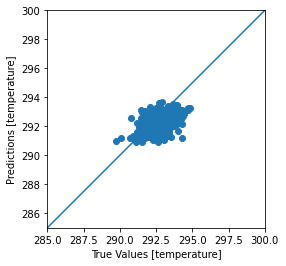

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(Test_labels, Test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [285,300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
np.corrcoef(Test_labels, Test_predictions)

In [ ]:
errors = abs(Test_predictions - Test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', (np.mean(errors)))

Mean Absolute Error: 0.7445083377581451


In [ ]:
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")

K = 5

scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr_gs.fit(train_features, train_labels)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svr_gs.cv_results_['mean_test_score']
stds = svr_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Grid scores on training set:
-1.094 (+/-0.043) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-1.157 (+/-0.046) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-1.173 (+/-0.050) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-1.179 (+/-0.053) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-1.180 (+/-0.053) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-1.180 (+/-0.052) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-1.180 (+/-0.052) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-1.180 (+/-0.052) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-1.110 (+/-0.036) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-1.147 (+/-0.043) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-1.166 (+/-0.048) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-1.175 (+/-0.051) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-1.176 (+/-0.051) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-1.177 (+/-0.051) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-1.177 (+/-0.051) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}
-1.177 (+/-0.051) for 

#Linear Regression Model

In [ ]:
train_dataset = tempDF.sample(frac=0.8, random_state=0)
test_dataset = tempDF.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('temperature')
test_labels = test_features.pop("temperature")
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
linear_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [ ]:
history = linear_model.fit(
    train_features, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
np.corrcoef(test_labels, test_predictions)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [temp]')
_ = plt.ylabel('Count')

#Construction of the model.

In [ ]:
def SelectArea(tempDF):
  SelTemp = tempDF.loc[(tempDF['X'] <= 790000) | (tempDF['Y'] >= 2490000)]
  SelTemp = SelTemp.drop(['X'], axis=1)
  SelTemp = SelTemp.drop(['Y'], axis=1)
  return SelTemp

In [ ]:
def SelectArea(tempDF):
  indexNamesX1 = tempDF[ tempDF['X'] >= 773110 ].index
  tempDF.drop(indexNamesX1 , inplace=True)
  indexNamesX2 = tempDF[ tempDF['X'] <= 690000 ].index
  tempDF.drop(indexNamesX2 , inplace=True)
  indexNamesY1 = tempDF[ tempDF['Y'] >= 2580000 ].index
  tempDF.drop(indexNamesY1 , inplace=True)
  indexNamesY2 = tempDF[ tempDF['Y'] <= 2510000 ].index
  tempDF.drop(indexNamesY2 , inplace=True)
  tempDF = tempDF.drop(['X'], axis=1)
  tempDF = tempDF.drop(['Y'], axis=1)
  return tempDF;

In [ ]:
train_dataset = SelectArea(tempDF).sample(frac=1, random_state=0) # Set frac to 1 because this tempDF dataset is used exclusively for training
test_dataset = SelectArea(tempDF).drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('temperature')
test_labels = test_features.pop("temperature")
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
train_dataset

,temperature,3,4,5,6
614,290.607526,2,97982.845396,902.985168,12
1547,292.060582,31,269986.501802,6123.873535,3
1669,292.742695,68,164829.357725,2761.906250,6
960,292.279069,35,309080.328400,1617.907471,13
580,292.537373,19,73068.926964,1312.539062,6
...,...,...,...,...,...
2668,293.430456,17,178770.819166,3921.711914,5
844,293.060326,22,33507.688113,9068.543945,10
1920,292.279993,5,60797.151619,1772.137939,16
1627,292.831345,32,305471.102199,14501.342773,9


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[    2.   97982.85   902.99    12.  ]]

Normalized: [[-1.15 -0.43 -0.46  1.53]]


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='MeanAbsoluteError',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)

In [ ]:
dnn_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_37 (Normaliza  (None, 4)                9         
 tion)                                                           
                                                                 
 dense_88 (Dense)            (None, 16)                80        
                                                                 
 dense_89 (Dense)            (None, 8)                 136       
                                                                 
 dense_90 (Dense)            (None, 1)                 9         
                                                                 
Total params: 234
Trainable params: 225
Non-trainable params: 9
_________________________________________________________________


In [ ]:
print('a\nb')

a
b


In [ ]:
'a\nb'

'a\nb'

#Training and Result.

In [ ]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=500)

In [ ]:
print(history.history['val_loss'][-1])

0.9698944687843323


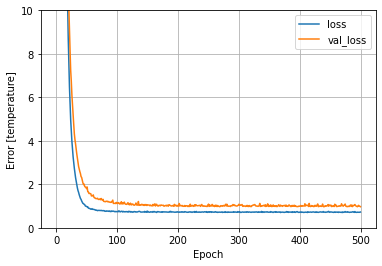

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [temperature]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [ ]:
# Hong Kong Island Area with no samples filtered
def PrepareTest():
  testDF = pd.DataFrame(data = (filter(TempData)), columns = ["temperature"])
  testDF.insert(1, 'Y', (filter(dataY)), True)
  testDF.insert(2, 'X', (filter(dataX)), True)
  counter = 3

  for image in CenterImageSet:
    testDF.insert(counter,counter,filter(image), True)
    counter = counter + 1
  

  indexNamesX1 = testDF[ testDF['X'] <= 790000 ].index
  testDF.drop(indexNamesX1 , inplace=True)
  indexNamesX2 = testDF[ testDF['X'] >= 850000 ].index
  testDF.drop(indexNamesX2 , inplace=True)
  indexNamesY1 = testDF[ testDF['Y'] >= 2490000 ].index
  testDF.drop(indexNamesY1 , inplace=True)
  indexNamesY2 = testDF[ testDF['Y'] <= 2450000 ].index
  testDF.drop(indexNamesY2 , inplace=True)
  return testDF

TestDF = PrepareTest()


TestDF = TestDF.drop(['X'], axis=1)
TestDF = TestDF.drop(['Y'], axis=1)
test_dataset = TestDF.sample(frac=0.8, random_state=0)
test_features = test_dataset.copy()
test_labels = test_features.pop("temperature")

val_dataset = TestDF.sample(frac=0.2, random_state=0)
val_features = val_dataset.copy()
val_labels = val_features.pop("temperature")

In [ ]:
val_results = {}
val_results['dnn_model'] = dnn_model.evaluate(val_features, val_labels, verbose=0)
pd.DataFrame(val_results, index=['Mean absolute error [Temper]']).T

,Mean absolute error [Temper]
dnn_model,1.075358


In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Temper]']).T

,Mean absolute error [Temper]
dnn_model,1.348577


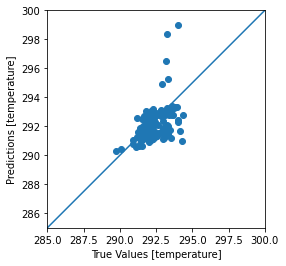

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [285,300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
np.corrcoef(test_labels, test_predictions)

array([[1.        , 0.34287404],
       [0.34287404, 1.        ]])

In [ ]:
TestDF

,temperature,3,4,5,6
3284,291.640501,8,79490.472419,805.892578,7
3285,291.559732,1,76324.300243,843.565430,7
3286,291.952965,3,23236.527317,4251.524414,7
3287,291.597092,12,34462.737869,645.755127,9
3288,292.694730,8,113790.479508,644.062561,7
...,...,...,...,...,...
3681,293.111423,2,48571.896022,3677.674561,8
3682,293.354593,1,16810.817884,7321.864258,10
3685,292.421085,1,56096.339071,1735.067627,10
3696,292.990494,8,14282.911026,444.855225,11


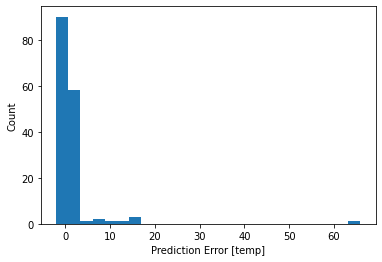

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [temp]')
_ = plt.ylabel('Count')

In [ ]:
Test_dataset = TestDF
Test_features = Test_dataset.copy()
Test_labels = Test_features.pop("temperature")
Test_predictions = dnn_model.predict(Test_features).flatten() #Test instead of test to make te difference between filtered and unfiltered testset

In [ ]:
realLST = TestDF['temperature']

In [ ]:
LSTarr = np.array(realLST)

In [ ]:
reshapedPre = np.reshape(Test_predictions,(40,60)) #Here we use the Test_prediction for it represent the whole map

In [ ]:
reshapedOrigin = np.reshape(LSTarr,(40,60))

In [ ]:
reshapedPre[(reshapedOrigin == 0)] = 0

In [ ]:
reshapedPre[(reshapedPre > 300)] = 0

In [ ]:
plt.title("Temperature", fontsize =20)
plt.imshow(reshapedPre, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
plt.title("Temperature", fontsize =20)
plt.imshow(reshapedOrigin, cmap='hot', interpolation='nearest')
plt.show()

#Export Model & Dataset

In [ ]:
dnn_model.save('dnn_model')

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

In [ ]:
reloaded

In [ ]:
test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
train_features.shape

(61258, 9)

In [ ]:
test_features.shape

(12252, 9)

In [ ]:
test_features['Area']

0       10041.799805
3       18369.834839
7       14106.419677
21      59211.466105
24      11909.649658
            ...     
4807    22148.893392
4813    84364.153197
4814    36015.668783
4819    47848.688192
4823    90099.152953
Name: Area, Length: 965, dtype: float64

In [ ]:
test_features['X']

0       631504.163
3       633504.163
7       790504.163
21      756504.163
24      770504.163
           ...    
4807    648504.163
4813    694504.163
4814    637504.163
4819    700504.163
4823    696504.163
Name: X, Length: 965, dtype: float64

In [ ]:
test_features['Y']

0       2630258.89
3       2618258.89
7       2617258.89
21      2614258.89
24      2614258.89
           ...    
4807    2423258.89
4813    2422258.89
4814    2421258.89
4819    2421258.89
4823    2420258.89
Name: Y, Length: 965, dtype: float64

In [ ]:
reloaded.predict(test_features).shape

(965, 1)

In [ ]:
LSTprediction = reloaded.predict(train_features)

In [ ]:
np.where(LSTprediction

array([[3.0221204e+02],
       [2.9475723e+02],
       [2.9216342e+02],
       ...,
       [2.9826278e+35],
       [2.9826278e+35],
       [2.9826278e+35]], dtype=float32)

In [ ]:
reshapedPre = np.reshape(LSTprediction,(218,281))

In [ ]:
reshapedPre[reshapedPre < 250] = 0

In [ ]:
reshapedPre[reshapedPre > 350] = 0

In [ ]:
selectedTemp.max()

296.7085614885603

In [ ]:
reshapedPre.max()

322.95016

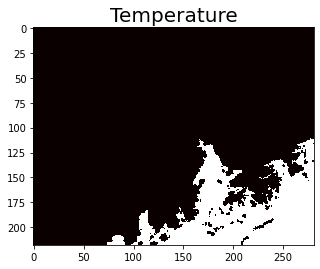

In [ ]:
plt.title("Temperature", fontsize =20)
plt.imshow(reshapedPre, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
test_results['reloaded']

0.6263470649719238

In [ ]:
test_results={}

In [ ]:
tempDF.to_csv('Nightemp_All_variable_included.csv')
from google.colab import files
files.download('Nightemp_All_variable_included.csv')

#Plots

In [ ]:
plt.title("Predicted LST with RandomForestRegressor", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(reshapedPre),cmap ='jet',vmin=287,vmax=297)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Observed LST", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(reshapedOrigin),cmap ='jet',vmin=287,vmax=297)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Less Matrix", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(lessMatrix),cmap ='jet',vmin=-4,vmax=4)
plt.colorbar(anchor=(-4, 4))
plt.show()

In [ ]:
plt.title("Predicted LST with RandomForestRegressor", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(reshapedPre),cmap ='jet',vmin=287,vmax=297)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Observed LST", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(reshapedOrigin),cmap ='jet',vmin=287,vmax=297)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Less Matrix", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(lessMatrix),cmap ='jet',vmin=-4,vmax=4)
plt.colorbar(anchor=(-4, 4))
plt.show()

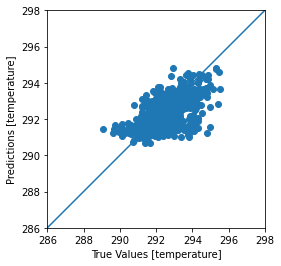

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(Test_labels, Test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
Test_labels

40642    0.0
40643    0.0
40644    0.0
40645    0.0
40646    0.0
        ... 
51578    0.0
51579    0.0
51580    0.0
51581    0.0
51582    0.0
Name: temperature, Length: 2400, dtype: float64

In [ ]:
Test_labels

40642    0.0
40643    0.0
40644    0.0
40645    0.0
40646    0.0
        ... 
51578    0.0
51579    0.0
51580    0.0
51581    0.0
51582    0.0
Name: temperature, Length: 2400, dtype: float64

In [ ]:
np.corrcoef(Test_labels, Test_predictions)

array([[1.        , 0.33240889],
       [0.33240889, 1.        ]])

In [ ]:
lessMatrix = reshapedOrigin - reshapedPre

In [ ]:
errors = abs(reshapedOrigin - reshapedPre)

In [ ]:
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.2428482584977189


In [ ]:
lessMatrix[(lessMatrix > 20)] = 0
lessMatrix[(lessMatrix < -20)] = 0

In [ ]:
lessMatrix.shape

(40, 60)

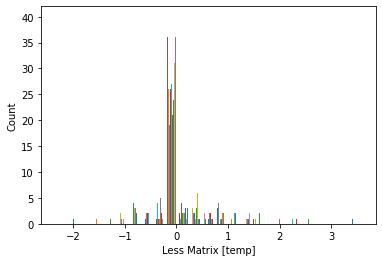

In [ ]:
plt.hist(lessMatrix, bins=25)
plt.xlabel('Less Matrix [temp]')
_ = plt.ylabel('Count')

In [ ]:
lessMatrix.mean()

0.08285540441594139

In [ ]:
plt.title("LessMatrix", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(np.flipud(lessMatrix),vmin=-10,vmax=10)
plt.colorbar(anchor=(-10, 10))
plt.show()

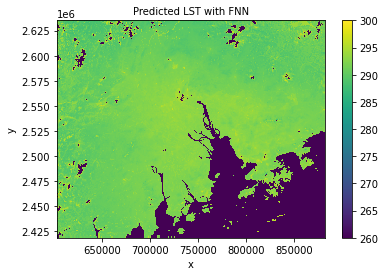

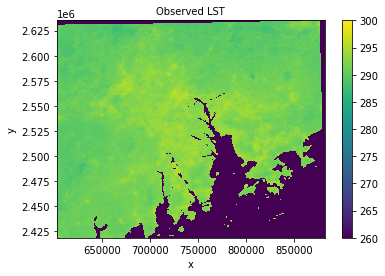

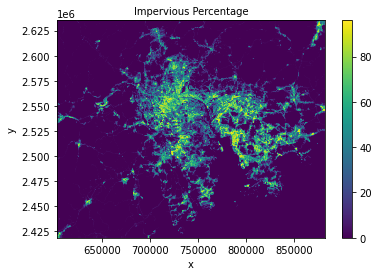

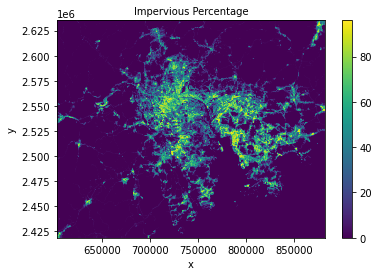

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.title("Predicted LST with FNN", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,reshapedPre,vmin=260,vmax=300)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Observed LST", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,NightImage,vmin=260,vmax=300)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Impervious Percentage", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,imperviousData)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Impervious Percentage", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,imperviousData)
plt.colorbar(anchor=(250, 300))
plt.show()

from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

In [ ]:
TempData.shape

(218, 281)

In [ ]:
tempY

<xarray.DataArray 'y' (y: 218)>
array([2635258.89, 2634258.89, 2633258.89, ..., 2420258.89, 2419258.89,
       2418258.89])
Coordinates:
  * y            (y) float64 2.635e+06 2.634e+06 ... 2.419e+06 2.418e+06
    spatial_ref  int64 0

In [ ]:
plotDF = pd.DataFrame(data = TempData.flatten(), columns = ["temperature"])
plotDF.insert(1, 'Y', ((dataY.flatten())), True)
plotDF.insert(2, 'X', ((dataX.flatten())), True)

In [ ]:
indexNamesX1 = plotDF[ plotDF['X'] <= 790000 ].index
plotDF.drop(indexNamesX1 , inplace=True)
indexNamesX2 = plotDF[ plotDF['X'] >= 850000 ].index
plotDF.drop(indexNamesX2 , inplace=True)
indexNamesY1 = plotDF[ plotDF['Y'] >= 2490000 ].index
plotDF.drop(indexNamesY1 , inplace=True)  
indexNamesY2 = plotDF[ plotDF['Y'] <= 2450000 ].index
plotDF.drop(indexNamesY2 , inplace=True)

In [ ]:
LSTarr = np.array(plotDF['temperature'])

In [ ]:
Xarr = np.array(plotDF['X'])
Yarr = np.array(plotDF['Y'])

In [ ]:
HKLST = np.reshape(LSTarr,(40,60))
HKX = np.reshape(Xarr,(40,60))
HKY = np.reshape(Yarr,(40,60))

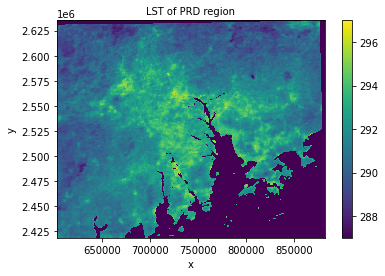

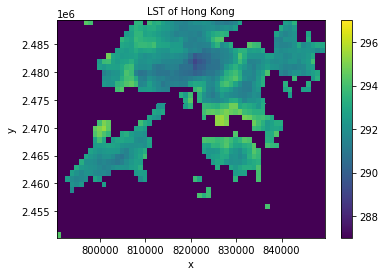

In [ ]:
plt.title("LST of PRD region", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,NightImage,vmin=287,vmax=297)
plt.colorbar(anchor=(290, 300))
plt.show()

plt.title("LST of Hong Kong", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(HKX,HKY,HKLST,vmin=287,vmax=297)
plt.colorbar(anchor=(250, 300))
plt.show()